## Loading and Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

/Users/rachelliao/anaconda3/envs/ensemble/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Load the dataset
df = pd.read_parquet('dataset/accepted_2007_to_2018Q4.parquet')

## Assessment

In [3]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Print the shape of the dataset
df.shape

(22511, 151)

In [5]:
# Print the first 5 rows of the dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,None,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,None,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,None,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,NaN,NaN,None,None,None,NaN,NaN,None,NaN,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,None,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,None,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,None,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,N

In [6]:
# Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22511 entries, 0 to 22510
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 25.9+ MB


In [7]:
# Display the data types of the dataset
df.dtypes

id                                              int64
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [8]:
# Check the number of unique values in each column
df.nunique()

id                                            22511
member_id                                         0
loan_amnt                                      1140
funded_amnt                                    1140
funded_amnt_inv                                1190
term                                              2
int_rate                                         64
installment                                    6915
grade                                             7
sub_grade                                        35
emp_title                                     10992
emp_length                                       11
home_ownership                                    3
annual_inc                                     2442
verification_status                               3
issue_d                                           1
loan_status                                       6
pymnt_plan                                        2
url                                           22511
desc        

In [9]:
# Get a statistical summary of the dataset
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,2.251100e+04,0.0,22511.000000,22511.000000,22511.000000,22511.000000,22511.000000,2.251100e+04,22509.000000,22510.000000,22510.000000,22510.000000,22510.000000,11637.000000,4038.00000,22510.000000,22510.000000,22510.000000,22499.00000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,6466.000000,22510.0,169.000000,169.000000,22510.000000,22510.000000,2.251000e+04,21344.000000,21344.000000,21344.000000,21344.000000,20785.000000,21344.000000,18595.000000,21344.000000,21344.000000,21344.000000,21344.000000,22510.000000,21344.000000,21344.000000,21344.000000,22510.000000,22510.000000,22296.000000,22282.000000,22510.000000,22510.000000,21919.000000,22510.000000,22510.000000,22510.000000,22510.000000,22303.000000,5715.000000,20159.000000,8085.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,22510.000000,21560.000000,22510.000000,22510.000000,22510.000000,22510.000000,22282.000000,22510.000000,22510.000000,2.251000e+04,22510.000000,22510.000000,22510.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,180.000000,180.0,180.000000,144.000000,180.000000,180.000000,662.000000,662.000000,662.000000
mean,6.756447e+07,NaN,15031.787793,15031.787793,15025.527520,12.255020,436.321286,7.820695e+04,19.423974,0.335584,695.075522,699.075611,0.608796,34.162929,65.69787,12.140116,0.238250,17388.656908,51.57675,25.538783,994.961977,994.471550,15043.269607,15037.171987,12062.974932,2748.012439,2.121175,230.161043,41.006250,4262.523270,677.663172,661.832519,0.023678,44.457934,1.0,114705.080296,18.990828,0.004798,279.812306,1.435598e+05,1.108602,2.928879,0.761525,1.674100,20.917873,36538.676068,71.576499,1.388587,2.974747,5887.961207,60.874859,34865.387161,0.943919,1.537341,2.233602,4.876499,13311.317859,10591.638366,59.810511,0.008574,14.074500,127.087823,185.524878,13.055664,7.452466,1.653354,23.932700,39.150306,6.458108,35.480891,0.529542,3.725011,5.692625,4.8396

Here are some of the key statistics:

- The average loan amount (loan_amnt) is approximately $15,031.8.
- The minimum loan amount is $1,000, and the maximum is $35,000.
- The average interest rate (int_rate) is approximately 12.255%.
- The average annual income (annual_inc) of borrowers is approximately $78,206.9.

In [10]:
# Check the number of null values in each column
df.isnull().sum()

id                                                0
member_id                                     22511
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      1349
emp_length                                     1340
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
desc        

In [11]:
# Check for duplicate rows
df.duplicated().sum()

0

## Cleaning

In [12]:
# Create a copy of the original dataframe
df_clean = df.copy()

# Drop 'id' and 'member_id' column
df_clean.drop(['id', 'member_id'], axis=1, inplace=True)

# Display the first few rows of the cleaned dataframe
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,None,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,None,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,None,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,NaN,NaN,None,None,None,NaN,NaN,None,NaN,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,None,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,None,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,None,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
# Check the percentage of missing values in each column
df_clean.isnull().sum() / len(df_clean) * 100

loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       5.992626
emp_length                                      5.952645
home_ownership                                  0.000000
annual_inc                                      0.000000
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan                                      0.000000
url                                             0.000000
desc                           

In [14]:
# Get the columns with more than 20% missing values
cols_to_drop = df_clean.columns[df_clean.isnull().sum() / len(df_clean) * 100 > 20]

# Drop the columns with more than 20% missing values
df_clean.drop(cols_to_drop, axis=1, inplace=True)

In [15]:
# Check the shape of the dataframe
df_clean.shape

(22511, 106)

In [16]:
# Check the percentage of missing values in each column
df_clean.isnull().sum() / len(df_clean) * 100


loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.992626
emp_length                     5.952645
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.590822
zip_code                       0.004442
addr_state                     0.004442
dti                            0.008885
delinq_2yrs                    0.004442
earliest_cr_line               0.004442
fico_range_low                 0.004442


In [17]:
# Get the columns with less than 20% missing values
cols_to_fill = df_clean.columns[df_clean.isnull().sum() / len(df_clean) * 100 < 20]

# Fill the missing values with the mean of the respective columns for float columns
for col in cols_to_fill:
    if df_clean[col].dtype == 'float64':
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Check the percentage of missing values in each column 
df_clean.isnull().sum() / len(df_clean) * 100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     5.992626
emp_length                    5.952645
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.590822
zip_code                      0.004442
addr_state                    0.004442
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.004442
fico_range_low                0.000000
fico_range_high          

In [18]:
# Drop the missing values for object columns
df_clean.dropna(inplace=True)

# Check the percentage of missing values in each column
df_clean.isnull().sum() / len(df_clean) * 100

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
fico_range_low                0.0
fico_range_high               0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [19]:
# Check the shape of the dataframe
df_clean.shape

(21015, 106)

## EDA

In [20]:
print(df_clean['loan_status'].unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)']


In [21]:
# Get the count of each unique value in 'loan_status' column
df_clean['loan_status'].value_counts()

Fully Paid            14838
Charged Off            3711
Current                2285
Late (31-120 days)      116
In Grace Period          53
Late (16-30 days)        12
Name: loan_status, dtype: int64

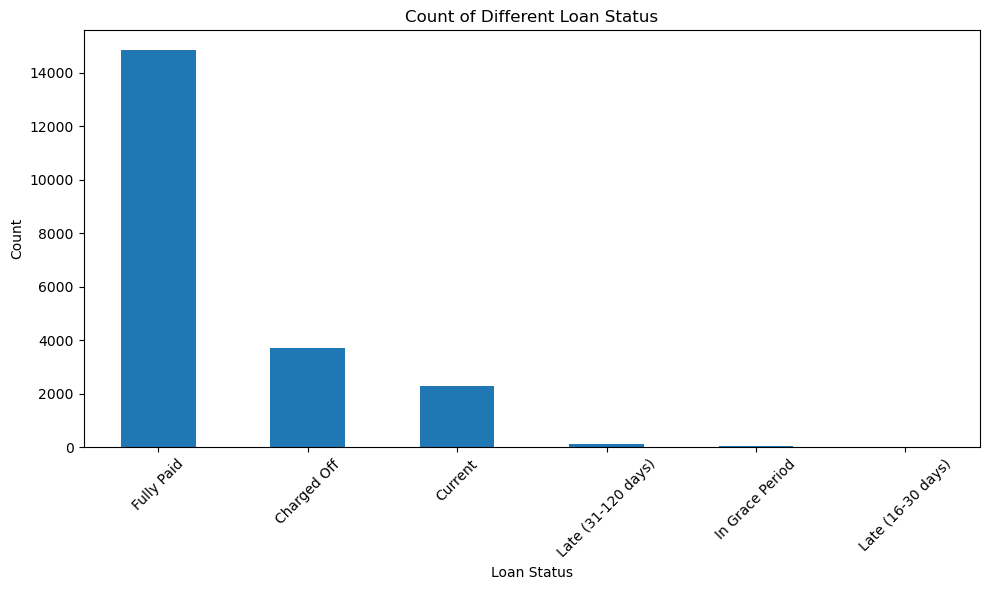

In [22]:
# Create a bar plot for the count of each unique value in 'loan_status' column
plt.figure(figsize=(10, 6))
df_clean['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [23]:
# Get the percentage of each unique value in 'loan_status' column
df_clean['loan_status'].value_counts() / len(df_clean) * 100

Fully Paid            70.606709
Charged Off           17.658815
Current               10.873186
Late (31-120 days)     0.551987
In Grace Period        0.252201
Late (16-30 days)      0.057102
Name: loan_status, dtype: float64

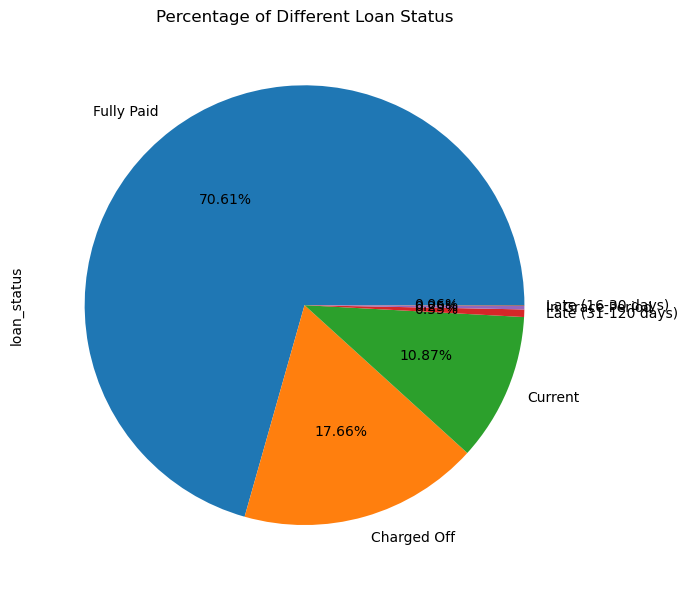

In [24]:
# Create a pie chart for the percentage of each unique value in 'loan_status' column
plt.figure(figsize=(10, 6))
loan_status_counts = df_clean['loan_status'].value_counts()
loan_status_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Percentage of Different Loan Status')
plt.tight_layout()
plt.show()

In [25]:
# Drop the rows with 'Late (16-30 days)', 'Late (31-120 days)', and 'In Grace Period' values in 'loan_status' column
df_clean = df_clean[df_clean['loan_status'] != 'Late (16-30 days)']
df_clean = df_clean[df_clean['loan_status'] != 'Late (31-120 days)']
df_clean = df_clean[df_clean['loan_status'] != 'In Grace Period']

# Check the shape of the dataframe
df_clean.shape

(20834, 106)

In [26]:
# Create a new DataFrame with modified loan_status values
df_modified = df_clean.copy()
df_modified['loan_status'] = df_modified['loan_status'].replace(['Fully Paid', 'Current'], 'Paid')
df_modified['loan_status'] = df_modified['loan_status'].replace(['Charged Off'], 'Default')

# Show the first 5 rows of the modified DataFrame
df_modified.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.000000,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.000000,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,6.458108,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000

In [27]:
# Get the count of each unique value in 'loan_status' column
df_modified['loan_status'].value_counts()

Paid       17123
Default     3711
Name: loan_status, dtype: int64

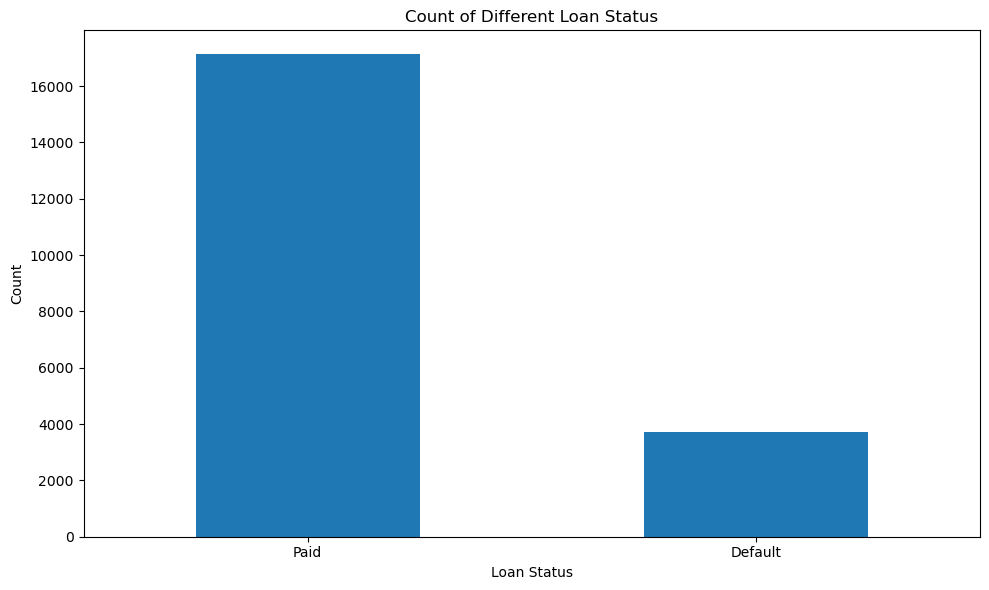

In [28]:
# Create a bar plot for count of values in the modified 'loan_status' column
plt.figure(figsize=(10, 6))
df_modified['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# Get the percentage of each unique value in 'loan_status' column
df_modified['loan_status'].value_counts() / len(df_modified) * 100

Paid       82.18777
Default    17.81223
Name: loan_status, dtype: float64

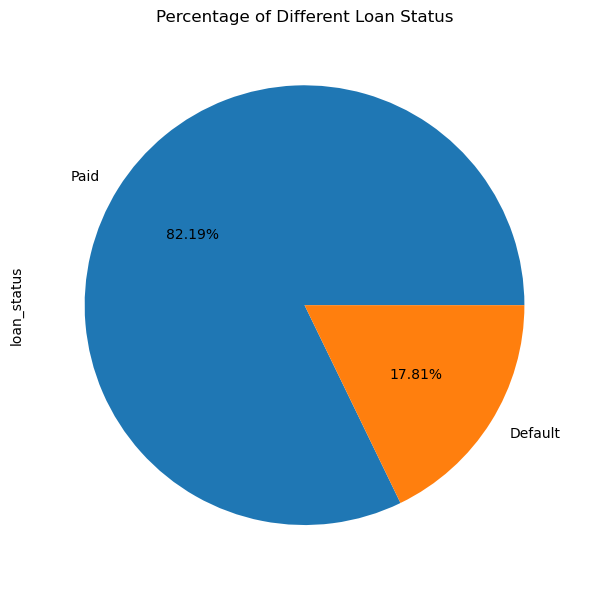

In [30]:
# Create a pie chart for the percentage of each unique value in the modified 'loan_status' column
plt.figure(figsize=(10, 6))
loan_status_counts = df_modified['loan_status'].value_counts()
loan_status_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Percentage of Different Loan Status')
plt.tight_layout()
plt.show()

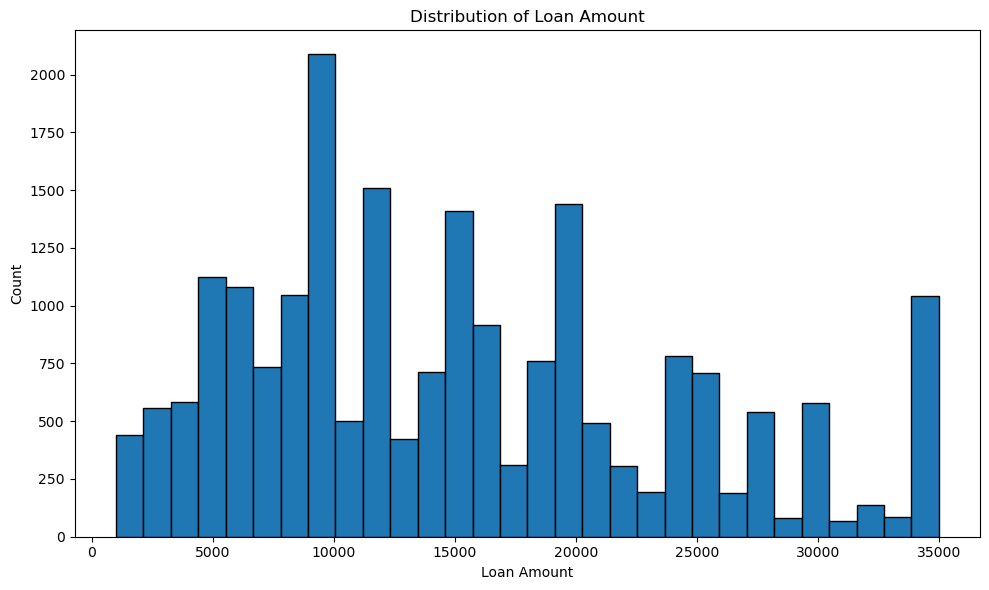

In [31]:
# Plot a histogram for the 'loan_amnt' column
plt.figure(figsize=(10, 6))
plt.hist(df_modified['loan_amnt'], bins=30, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.tight_layout()
plt.show()

The histogram shows the distribution of loan amounts in the dataset: 
- Most of the loans are in the range of $5,000 to $20,000.

In [32]:
# Create a list of numerical columns
num_cols = df_modified.select_dtypes(include=np.number).columns.tolist()

# Display the list of numerical columns
num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_r

### Numerical Columns

In [33]:
# Create a list of high correlation features
high_corr_features = []

# Create two for loops to check the correlation and p-value between numerical columns
for col1 in num_cols:
    for col2 in num_cols:
        if col1 != col2:
            array1 = df_modified[col1].values
            array2 = df_modified[col2].values
            if np.var(array1) > 0 and np.var(array2) > 0:
                corr, p_value = stats.pearsonr(df_modified[col1], df_modified[col2])
                if corr > 0.5 and p_value < 0.05:
                    high_corr_features.append((col1, col2, corr, p_value))

# Create a dataframe from the list of high correlation features
high_corr_df = pd.DataFrame(high_corr_features, columns=['Feature_1', 'Feature_2', 'Correlation', 'P-Value'])

# Display the dataframe
high_corr_df

,Feature_1,Feature_2,Correlation,P-Value
0,loan_amnt,funded_amnt,1.000000,0.0
1,loan_amnt,funded_amnt_inv,0.999994,0.0
2,loan_amnt,installment,0.943674,0.0
3,loan_amnt,total_pymnt,0.871308,0.0
4,loan_amnt,total_pymnt_inv,0.871280,0.0
5,loan_amnt,total_rec_prncp,0.772013,0.0
6,loan_amnt,total_rec_int,0.682632,0.0
7,funded_amnt,loan_amnt,1.000000,0.0
8,funded_amnt,funded_amnt_inv,0.999994,0.0
9,funded_amnt,installment,0.943674,0.0


In [34]:
# Create a correlation matrix
corr_matrix = df_modified[num_cols].corr()
corr_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,1.000000,0.999994,0.165316,0.943674,0.326729,0.039956,-0.037570,0.121377,0.121372,-0.022722,0.181298,-0.071383,0.328374,0.119163,0.199929,0.293921,0.293918,0.871308,0.871280,0.772013,0.682632,0.085074,0.170867,0.169641,0.406865,0.069896,0.063883,-0.039856,NaN,-0.004979,-0.013934,0.292655,-0.037619,0.012893,-0.019160,0.014659,-0.000715,0.119663,-0.102621,-0.046275,-0.024290,0.398203,0.005511,0.350269,0.002960,0.067625,0.003337,0.001495,0.203207,0.189347,0.058648,-0.008591,-0.007011,0.127460,0.190547,0.045809,0.031740,0.223290,0.030220,-0.002348,-0.060734,0.209518,0.172318,0.230783,0.210563,0.061642,0.174519,0.180652,0.167693,0.181279,0.001767,-0.007089,-0.038563,-0.036155,0.107219,0.023083,-0.099194,-0.003517,0.321981,0.258012,0.372222,0.184609
funded_amnt,1.000000,1.000000,0.999994,0.165316,0.943674,0.326729,0.039956,-0.037570,0.121377,0.121372,-0.022722,0.181298,-0.071383,0.328374,0.119163,0.199929,0.293921,0.293918,0.871308,0.871280,0.772013,0.682632,0.085074,0.170867,0.169641,0.406865,0.069896,0.063883,-0.039856,NaN,-0.004979,-0.013934,0.292655,-0.037619,0.012893,-0.019160,0.014659,-0.000715,0.119663,-0.102621,-0.046275,-0.024290,0.398203,0.005511,0.350269,0.002960,0.067625,0.003337,0.001495,0.203207,0.189347,0.058648,-0.008591,-0.007011,0.127460,0.190547,0.045809,0.031740,0.223290,0.030220,-0.002348,-0.060734,0.209518,0.172318,0.230783,0.210563,0.061642,0.174519,0.180652,0.167693,0.181279,0.001767,-0.007089,-0.038563,-0.036155,0.107219,0.023083,-0.099194,-0.003517,0.321981,0.258012,0.372222,0.184609
funded_amnt_inv,0.999994,0.999994,1.000000,0.164705,0.943645,0.326842,0.039725,-0.037631,0.121677,0.121672,-0.022816,0.181266,-0.071433,0.328391,0.118970,0.199959,0.293885,0.293885,0.871344,0.871328,0.772152,0.682387,0.085026,0.170717,0.169489,0.406873,0.070145,0.064101,-0.039876,NaN,-0.004996,-0.013932,0.292690,-0.037733,0.012856,-0.019299,0.014524,-0.000623,0.119629,-0.102703,-0.046411,-0.024408,0.398305,0.005309,0.350408,0.002875,0.067660,0.003207,0.001324,0.203241,0.189554,0.058458,-0.008603,-0.007006,0.127508,0.190696,0.045886,0.031859,0.223343,0.030282,-0.002272,-0.060821,0.209473,0.172211,0.230825,0.210640,0.061607,0.174501,0.180716,0.167575,0.181246,0.001783,-0.007118,-0.038601,-0.036340,0.107276,0.022881,-0.099149,-0.003630,0.322041,0.257992,0.372415,0.184594
int_rate,0.165316,0.165316,0.164705,1.000000,0.143793,-0.108507,0.222624,0.035244,-0.388214,-0.388212,0.249890,-0.015915,0.071544,-0.054173,0.203092,-0.040721,0.157436,0.157327,0.083724,0.083192,-0.073938,0.456869,0.076645,0.188080,0.188483,0.088274,-0.369591,-0.293472,0.027055,NaN,0.017675,0.017020,-0.094419,0.219454,0.037745,0.237065,0.191964,-0.121877,0.048887,0.168338,0.173992,0.170158,-0.101453,0.276753,-0.199481,0.166565,0.022511,0.251421,0.231333,-0.086231,

In [35]:
# Select the top 10 variables with the highest correlation values overall
top_10_corr_features = corr_matrix['loan_amnt'].sort_values(ascending=False).head(11).to_frame()
top_10_corr_features

,loan_amnt
loan_amnt,1.000000
funded_amnt,1.000000
funded_amnt_inv,0.999994
installment,0.943674
total_pymnt,0.871308
total_pymnt_inv,0.871280
total_rec_prncp,0.772013
total_rec_int,0.682632
last_pymnt_amnt,0.406865
max_bal_bc,0.398203


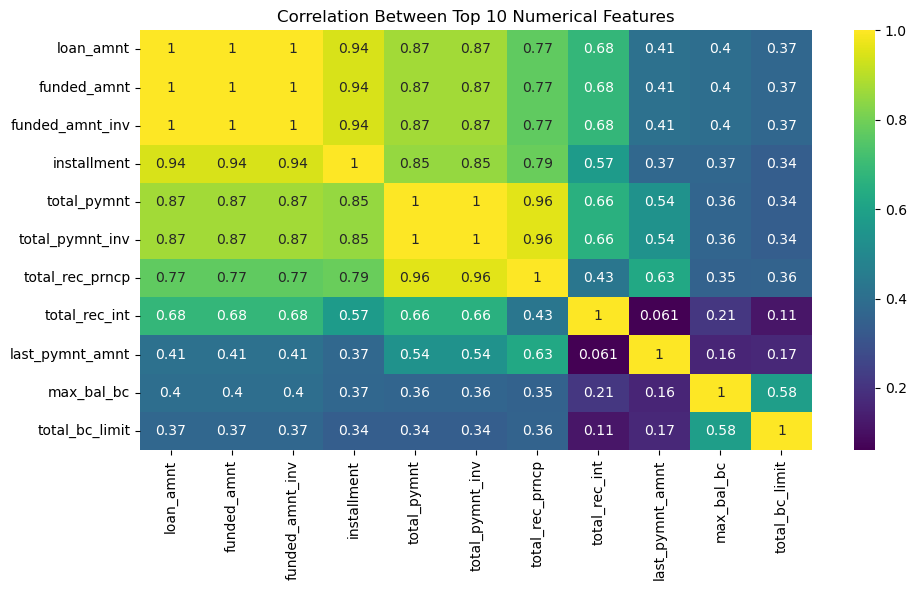

In [36]:
# Create a correlation matrix
top_10_corr_features = df_modified[top_10_corr_features.index].corr()

# Create a heatmap to visualize the correlation between the top 10 numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_corr_features, annot=True, cmap='viridis')
plt.title('Correlation Between Top 10 Numerical Features')
plt.tight_layout()
plt.show()

In [37]:
# Create a set to store the features to be removed
features_to_remove = set()

# Iterate over the high correlation dataframe
for index, row in high_corr_df.iterrows():
    feature_1 = row['Feature_1']
    feature_2 = row['Feature_2']
    
    # Add the feature with higher correlation coefficient to the set
    if row['Correlation'] > high_corr_df.loc[high_corr_df['Feature_2'] == feature_1, 'Correlation'].values[0]:
        features_to_remove.add(feature_1)
    else:
        features_to_remove.add(feature_2)

# Remove the features from the dataframe
df_selected_features = df_modified.drop(columns=features_to_remove)

# Display the features to be removed
features_to_remove

{'acc_now_delinq',
 'acc_open_past_24mths',
 'all_util',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'collection_recovery_fee',
 'delinq_2yrs',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'installment',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'loan_amnt',
 'max_bal_bc',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'out_prncp',
 'out_prncp_inv',
 'percent_bc_gt_75',
 'pub_rec',
 'pub_rec_bankruptcies',
 'recoveries',
 'revol_bal',
 'revol_util',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_acc',
 'total_bal_ex_mort',
 'total_bal_il',
 'total_bc_lim

In [38]:
# display which numercial features were left
df_selected_features.select_dtypes(include=np.number).columns.tolist()

['int_rate',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'total_rec_late_fee',
 'collections_12_mths_ex_med',
 'policy_code',
 'tot_coll_amt',
 'mths_since_rcnt_il',
 'total_cu_tl',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'pct_tl_nvr_dlq',
 'tax_liens']

In [39]:
# Display the shape of the dataframe
df_selected_features.shape

(20834, 43)

### Categorical Columns

In [40]:
# Create a list of categorical columns
cat_cols = df_selected_features.select_dtypes(include='object').columns.tolist()

# Display the list of categorical columns
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [41]:
# Initialize lists to store significant categorical columns and their p-values
significant_cat_cols = []
p_values = []

# Iterate over the categorical columns
for col in cat_cols:
    # Skip 'loan_status' column
    if col == 'loan_status':
        continue

    # Create a crosstab between the categorical column and 'loan_status' column
    crosstab = pd.crosstab(df_selected_features[col], df_selected_features['loan_status'])
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)
    
    # Check if the p-value is less than 0.05
    if p_value < 0.05:
        significant_cat_cols.append(col)
        p_values.append(p_value)

# Create a dataframe from the lists
chi2_df = pd.DataFrame({'Feature': significant_cat_cols, 'P-Value': p_values})

# Display the dataframe
chi2_df

,Feature,P-Value
0,term,5.451080e-58
1,grade,3.118026e-298
2,sub_grade,2.085448e-298
3,home_ownership,1.450835e-27
4,verification_status,1.819937e-44
5,purpose,1.803125e-14
6,title,2.975891e-14
7,addr_state,7.983931e-03
8,earliest_cr_line,1.644550e-02
9,initial_list_status,3.106177e-04


In [42]:
# drop all the features from chi2_df from the df_selected_features dataframe
df_selected_features.drop(columns=chi2_df['Feature'].values, inplace=True)

# display which categorical columns were left
df_selected_features.select_dtypes(include='object').columns.tolist()

['emp_title',
 'emp_length',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'zip_code',
 'application_type',
 'hardship_flag',
 'disbursement_method']

In [43]:
# Display the shape of the dataframe
df_selected_features.shape

(20834, 30)

In [44]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Identify the remaining categorical columns
categorical_cols = df_selected_features.select_dtypes(include='object').columns.tolist()

# Perform one-hot encoding using OneHotEncoder
encoded_features = ohe.fit_transform(df_selected_features[categorical_cols])

# Create a new dataframe with the encoded features
df_encoded = pd.DataFrame(encoded_features.toarray(), columns=ohe.categories_, dtype=int)

# Concatenate the encoded dataframe with the original numeric columns
df_encoded = pd.concat([df_selected_features.select_dtypes(exclude='object'), df_encoded], axis=1)

# Calculate correlations between categorical features and the target variable loan_status
corr_matrix = df_encoded.corr()
corr_with_target = corr_matrix['loan_status'].sort_values(ascending=False).head(10).to_frame()

# Create a heatmap to visualize the correlation between the top 10 categorical columns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target, annot=True, cmap='viridis')
plt.title('Correlation Between Top 10 Categorical Features')
plt.tight_layout()

ValueError: all arrays must be same length

### Logistic Regression

In [ ]:
# Create X and y variables
X = df_encoded.drop(columns='loan_status')
y = df_encoded['loan_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
accuracy_score(y_test, y_pred)

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Create a classification report
print(classification_report(y_test, y_pred))

### Support Vector Machine

In [ ]:
# Create a support vector classifier
svc = SVC()

# Fit the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Calculate accuracy score
accuracy_score(y_test, y_pred)

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Create a classification report
print(classification_report(y_test, y_pred))

### Random Forest

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy_score(y_test, y_pred)

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Create a classification report
print(classification_report(y_test, y_pred))

### XGBoost

In [ ]:
# Create an XGBClassifier
xgb = XGBClassifier()

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Calculate accuracy score
accuracy_score(y_test, y_pred)

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Create a classification report
print(classification_report(y_test, y_pred))

### Summary of Baseline Models

In [ ]:
# Create a dataframe to store the accuracy scores of different models
accuracy_scores = pd.DataFrame(columns=['Model', 'Accuracy Score'])

# Create a list of models
models = [log_reg, svc, rf, xgb]

# Iterate over the models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create a dataframe from the accuracy score
    accuracy_df = pd.DataFrame([[type(model).__name__, accuracy]], columns=['Model', 'Accuracy Score'])
    
    # Append the dataframe to accuracy_scores dataframe
    accuracy_scores = accuracy_scores.append(accuracy_df, ignore_index=True)

# Display the accuracy scores dataframe
accuracy_scores

In [ ]:
# Create a bar plot for accuracy scores of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy Score', data=accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a dataframe to store the confusion matrices of different models
confusion_matrices = pd.DataFrame(columns=['Model', 'TN', 'FP', 'FN', 'TP'])

# Iterate over the models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Create a confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Create a dataframe from the confusion matrix
    confusion_matrix_df = pd.DataFrame([[type(model).__name__, tn, fp, fn, tp]], columns=['Model', 'TN', 'FP', 'FN', 'TP'])
    
    # Append the dataframe to confusion_matrices dataframe
    confusion_matrices = confusion_matrices.append(confusion_matrix_df, ignore_index=True)

# Display the confusion matrices dataframe
confusion_matrices

In [ ]:
# Create a bar plot for confusion matrices of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='TP', data=confusion_matrices)
plt.xlabel('Model')
plt.ylabel('True Positives')
plt.title('True Positives of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a dataframe to store the classification reports of different models
classification_reports = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])

# Iterate over the models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Create a classification report
    classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    
    # Create a dataframe from the classification report
    classification_report_df['Model'] = type(model).__name__
    
    # Append the dataframe to classification_reports dataframe
    classification_reports = classification_reports.append(classification_report_df, ignore_index=True)

# Display the classification reports dataframe
classification_reports

In [ ]:
# Create a bar plot for precision of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='precision', data=classification_reports)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a bar plot for recall of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='recall', data=classification_reports)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a bar plot for f1-score of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='f1-score', data=classification_reports)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()